In [1]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=3dcdfa8e096c1dfd24dd39436b4bf6ee0edc34b25f9672bf363b63ac92e4e40b
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [2]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# データの読み込み
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
x_train, x_val = X_train / 255.0, X_test / 255.0
y_train, y_val = to_categorical(y_train), to_categorical(y_test)

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [0]:
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Activation, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras_radam import RAdam
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

def train(opt):

    #cnnの学習
    input_ = Input(shape=(32, 32, 3))

    c = Conv2D(64, (1, 1), padding="same")(input_)
    c = BatchNormalization()(c)
    c = Activation("relu")(c)
    c = Conv2D(64, (3, 3), padding="same")(c)
    c = BatchNormalization()(c)
    c = Activation("relu")(c)
    c = Conv2D(64, (3, 3), padding="same")(c)
    c = BatchNormalization()(c)
    c = Activation("relu")(c)
    c = Conv2D(64, (3, 3), strides=2)(c)
    c = BatchNormalization()(c)
    c = Activation("relu")(c)

    c = Conv2D(128, (3, 3), padding="same")(c)
    c = BatchNormalization()(c)
    c = Activation("relu")(c)
    c = Conv2D(128, (3, 3), padding="same")(c)
    c = BatchNormalization()(c)
    c = Activation("relu")(c)
    c = Conv2D(128, (3, 3), strides=2)(c)
    c = BatchNormalization()(c)
    c = Activation("relu")(c)

    c = Conv2D(256, (3, 3), padding="same")(c)
    c = BatchNormalization()(c)
    c = Activation("relu")(c)
    c = Conv2D(256, (3, 3), padding="same")(c)
    c = BatchNormalization()(c)
    c = Activation("relu")(c)
    c = Conv2D(256, (3, 3), strides=2)(c)
    c = BatchNormalization()(c)
    c = Activation("relu")(c)

    c = GlobalAveragePooling2D()(c)
    c = Dense(10, activation='softmax')(c)

    model = Model(input_, c)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    # Data Augmentation
    datagen = ImageDataGenerator(rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True)

    datagen.fit(x_train)

    #cnnの学習
    hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                               steps_per_epoch=x_train.shape[0] /128,
                               validation_data=(x_val, y_val),
                               epochs=100, 
                               verbose=1)

    print("val_acc is ",np.max(hist.history['val_acc']))

    return hist.history['val_acc']

In [18]:
acc_Radam = train(RAdam())

Epoch 1/100
391/390 [==============================] - 29s 75ms/step - loss: 1.6194 - acc: 0.4060 - val_loss: 2.7133 - val_acc: 0.3466
Epoch 2/100
391/390 [==============================] - 25s 64ms/step - loss: 1.2226 - acc: 0.5633 - val_loss: 1.4923 - val_acc: 0.5134
Epoch 3/100
391/390 [==============================] - 25s 65ms/step - loss: 1.0140 - acc: 0.6422 - val_loss: 1.3697 - val_acc: 0.6177
Epoch 4/100
391/390 [==============================] - 25s 65ms/step - loss: 0.8568 - acc: 0.7023 - val_loss: 1.5309 - val_acc: 0.5904
Epoch 5/100
391/390 [==============================] - 25s 64ms/step - loss: 0.7670 - acc: 0.7332 - val_loss: 0.9064 - val_acc: 0.7077
Epoch 6/100
391/390 [==============================] - 26s 67ms/step - loss: 0.6922 - acc: 0.7580 - val_loss: 0.6484 - val_acc: 0.7809
Epoch 7/100
391/390 [==============================] - 25s 64ms/step - loss: 0.6340 - acc: 0.7795 - val_loss: 1.3028 - val_acc: 0.6676
Epoch 8/100
391/390 [==============================] - 

In [19]:
acc_adam = train(Adam())

Epoch 1/100
391/390 [==============================] - 29s 75ms/step - loss: 1.5439 - acc: 0.4362 - val_loss: 1.8868 - val_acc: 0.4308
Epoch 2/100
391/390 [==============================] - 26s 67ms/step - loss: 1.1445 - acc: 0.5893 - val_loss: 1.2468 - val_acc: 0.5655
Epoch 3/100
391/390 [==============================] - 25s 65ms/step - loss: 0.9433 - acc: 0.6677 - val_loss: 1.1244 - val_acc: 0.6367
Epoch 4/100
391/390 [==============================] - 26s 66ms/step - loss: 0.7996 - acc: 0.7217 - val_loss: 1.2037 - val_acc: 0.6382
Epoch 5/100
391/390 [==============================] - 26s 66ms/step - loss: 0.7172 - acc: 0.7504 - val_loss: 0.8195 - val_acc: 0.7311
Epoch 6/100
391/390 [==============================] - 25s 64ms/step - loss: 0.6522 - acc: 0.7741 - val_loss: 0.8442 - val_acc: 0.7400
Epoch 7/100
391/390 [==============================] - 26s 66ms/step - loss: 0.5962 - acc: 0.7955 - val_loss: 0.7936 - val_acc: 0.7408
Epoch 8/100
391/390 [==============================] - 

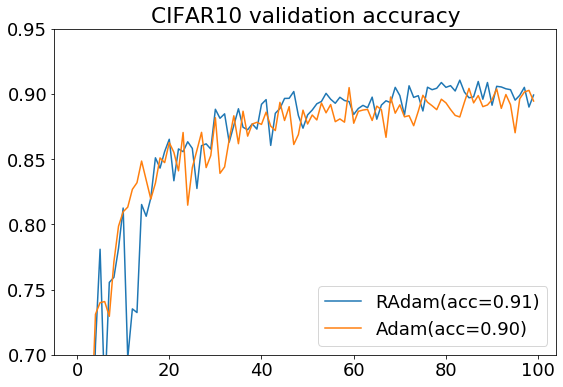

In [30]:
plt.figure(figsize=(9,6))
plt.rcParams["font.size"] = 18
plt.title("CIFAR10 validation accuracy")
plt.plot(acc_Radam,label="RAdam(acc=0.91)")
plt.plot(acc_adam,label="Adam(acc=0.90)")
plt.ylim(0.7,0.95)
plt.legend()
plt.show()